<a href="https://colab.research.google.com/github/Aminisom/CHL5230H-Datathon/blob/main/Datathon1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML_Course/BMI_Pred.csv')
print(df.head())

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                    4            1  1.569070  81.199394  32.981343  
1                    0            9  1.629449  74.273566  27.973877  
2                    2            3  1.637726  71.453466  26.640417  
3                    1            8  1.514198  98.163045  42.813720  
4                    0            7  1.410559  57.323914  28.810685  


In [ ]:
print(len(df))

23535


In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

# Display the data types of each column
df.dtypes

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Encoding 'Sex' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
df.describe()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,0.367070,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,0.482016,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,0.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,0.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,0.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,1.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,1.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


In [ ]:

# Define BMI categories and corresponding ranges
categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
ranges = [0, 18.5, 25.0, 30.0, float('inf')]

# Create a new column 'BMI Category' based on the ranges
df['BMI_Category'] = pd.cut(df['BMI'], bins=ranges, labels=categories, right=False)

# Display the transformed data
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Category
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Obese
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Obese
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [ ]:
X = df[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity']]
y = df['BMI Category']
#Now, split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)  # Setting K to 200 as an example
knn.fit(X_train, y_train)

In [ ]:
#Predict using the test data.

y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['BMI Category'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#feature engineering for improving f1 score and controlling data dimensionality
df['Sugar_to_Calorie_Ratio'] = df['Sugar_Intake'] / df['Calorie_Intake']

In [ ]:
df['Lifestyle_Index'] = df['Fast_Food_Frequency'] + df['Screen_Time']
df.head()

In [ ]:
X = df[['Age', 'Gender','Physical_Activity', 'Sugar_to_Calorie_Ratio','Lifestyle_Index']]
y = df['BMI Category']
#Now, split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=69)  # Setting K to 69 as an example
knn.fit(X_train, y_train)

In [ ]:
#Predict using the test data.

y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1070  227  265    0]
 [ 861  188  195    0]
 [ 879  206  203    0]
 [ 430   76  107    0]]
               precision    recall  f1-score   support

Normal Weight       0.33      0.69      0.45      1562
        Obese       0.27      0.15      0.19      1244
   Overweight       0.26      0.16      0.20      1288
  Underweight       0.00      0.00      0.00       613

     accuracy                           0.31      4707
    macro avg       0.22      0.25      0.21      4707
 weighted avg       0.25      0.31      0.25      4707



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


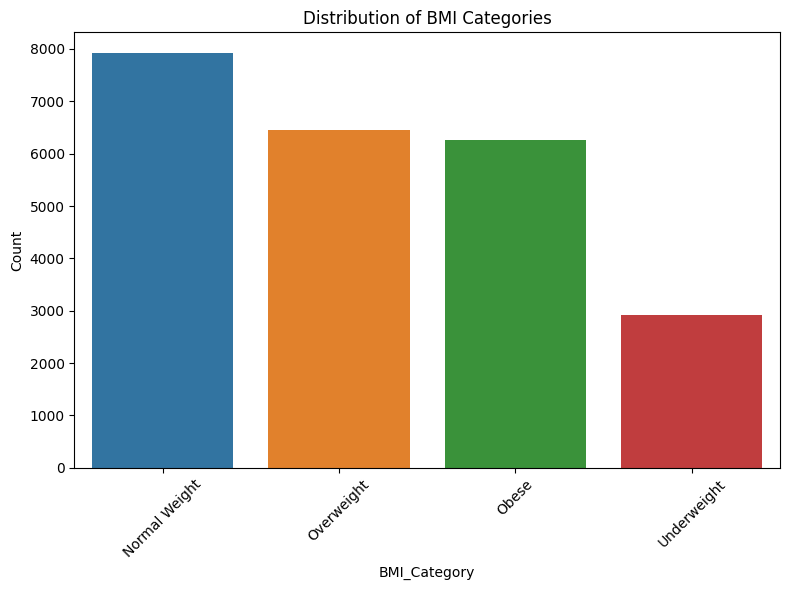

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

bmi_category_column = 'BMI_Category'

# Create a count plot to visualize the distribution of BMI categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=bmi_category_column, order=df[bmi_category_column].value_counts().index)

# Add labels and a title
plt.xlabel('BMI_Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


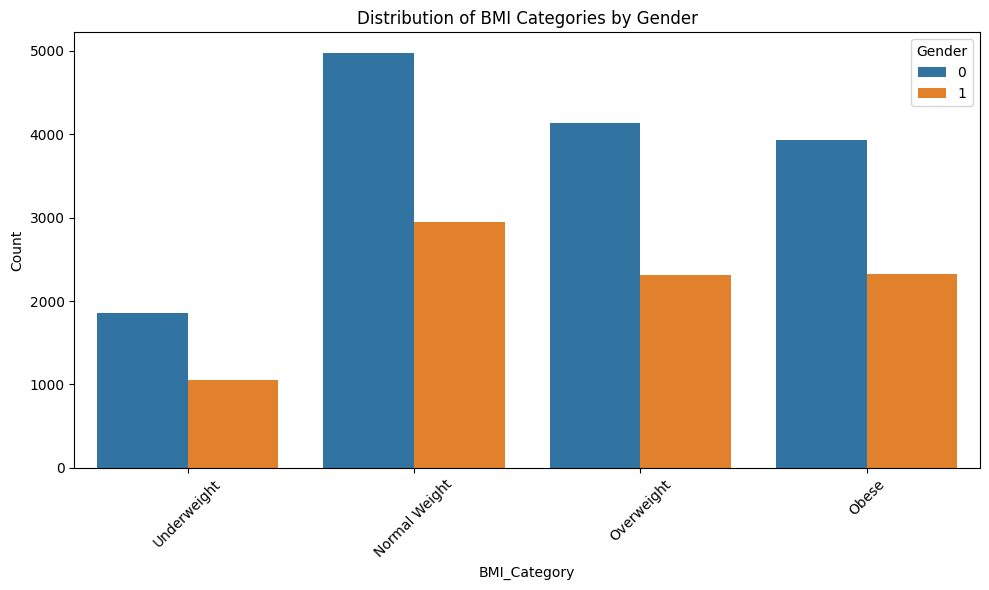

In [ ]:
bmi_category_column = 'BMI_Category'
gender_column = 'Gender'

# Create a grouped bar plot to show BMI categories based on gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=bmi_category_column, hue=gender_column)

# Add labels and a title
plt.xlabel('BMI_Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories by Gender')

# Show the legend
plt.legend(title='Gender')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


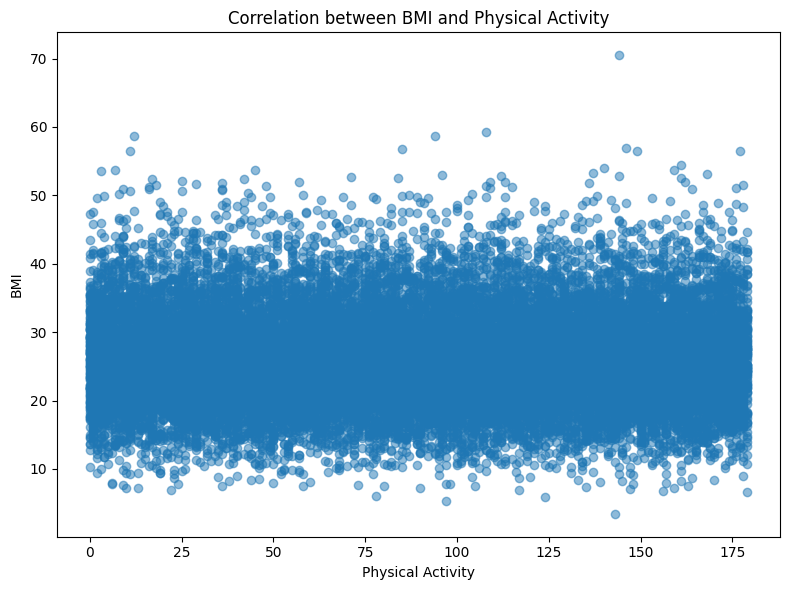

In [ ]:
bmi_column = 'BMI'
physical_activity_column = 'Physical_Activity'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[physical_activity_column], df[bmi_column], alpha=0.5)
plt.title('Correlation between BMI and Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('BMI')

# Show the plot
plt.tight_layout()
plt.show()


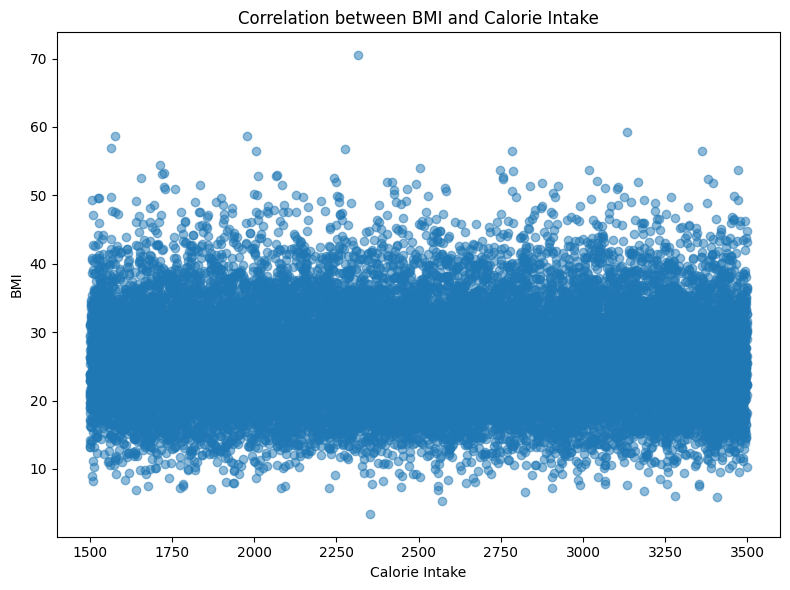

In [ ]:
bmi_column = 'BMI'
calorie_intake_column = 'Calorie_Intake'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[calorie_intake_column], df[bmi_column], alpha=0.5)
plt.title('Correlation between BMI and Calorie Intake')
plt.xlabel('Calorie Intake')
plt.ylabel('BMI')

# Show the plot
plt.tight_layout()
plt.show()


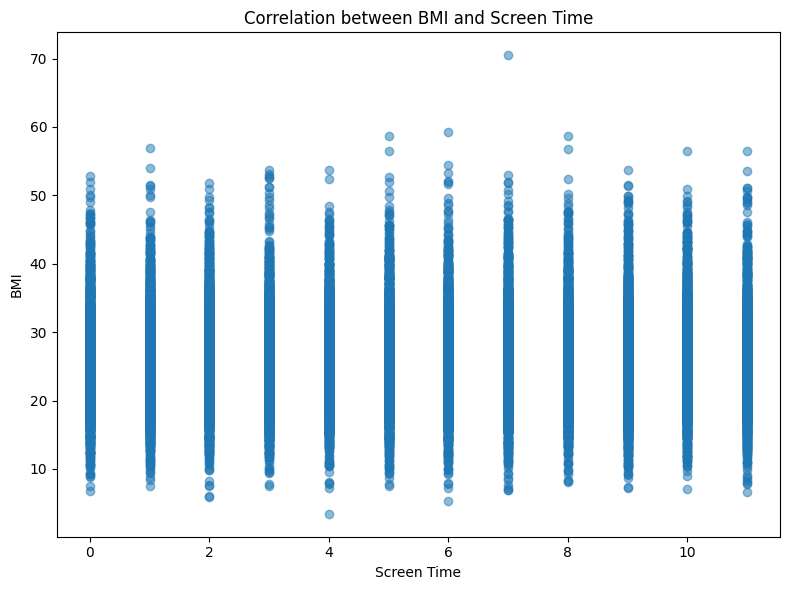

In [ ]:
bmi_column = 'BMI'
screen_time_column = 'Screen_Time'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[screen_time_column], df[bmi_column], alpha=0.5)
plt.title('Correlation between BMI and Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('BMI')

# Show the plot
plt.tight_layout()
plt.show()


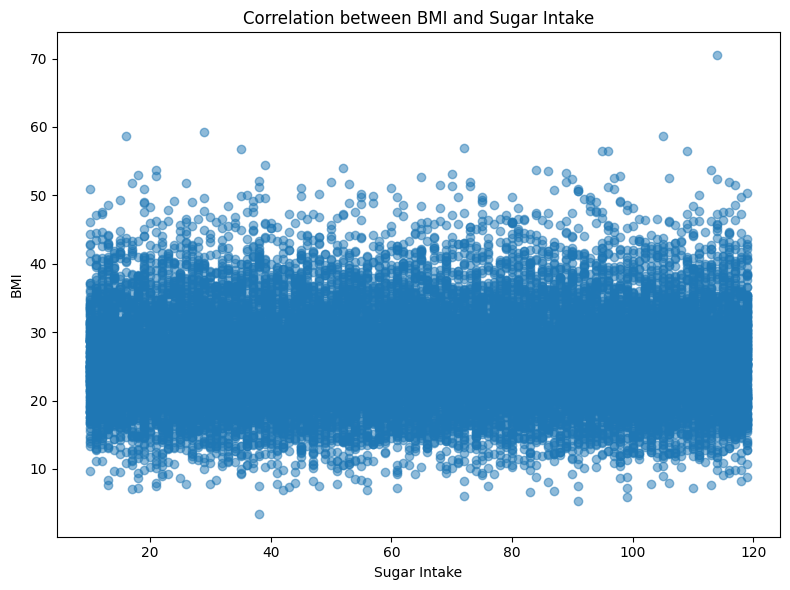

In [ ]:
bmi_column = 'BMI'
sugar_intake_column = 'Sugar_Intake'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[sugar_intake_column], df[bmi_column], alpha=0.5)
plt.title('Correlation between BMI and Sugar Intake')
plt.xlabel('Sugar Intake')
plt.ylabel('BMI')

# Show the plot
plt.tight_layout()
plt.show()
